<a href="https://colab.research.google.com/github/UJWAL-SHAH/ML/blob/master/Lab%20Work/ML_Lab4_J078.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python for data visualization

##**UJWAL SHAH**

##**ROLL NO : J078**

##**LAB: 4 (Submitted on: 09|08|/2020)**

##**EXERCISE: 1 & 2**

This Lab covers the following Topics:

  Pie charts

  Box plots

  Scatter plots

  Bubble plots

  Waffle chart

 Outliers Detection

  Plotting Maps

  Working on Maps(Different types of Maps)

  Interactive Maps & Informative Maps

  Choropleth Maps



### **Assignment 1:**

1)By Continent-region pie-chart use colorlists, explode, pct, figsize, add title, add axes, add legend, remove labels and use shadows. 

2)By Development-status pie-chart use colorlists, explode, pct, figsize, add title, add axes, add legend, remove labels and use shadows. 

3)Create 4 subplots - to display boxplot of top 5 countries in europe, asia, africa, oceania.

4)Identify countries which are outliers based on total migration.

5)Plot the bubble plot for Norway, Denmark, Finland




### **Assignment 2 for Norway, denmark sweden:**

1)Plot scatter plot -Done Below

2)Bubble plot -Done Below

3)Boxplot -Done Below

4)Waffle chart -Done Belowfor India,China,Pakistan

5)Check for outliers in years 2013- Done Below

6)Plot for mumbai city crimes (markers to map)- Have doneto plot Mumbai City co-ordinates & Crime Rate of San-Francise...So we can do it similarly for Mumbai City.

7)Immigration to India (Cloropleth maps) - Have Already Done For Cananda

8)PyWaffle  -  **"from pywaffle import Waffle"** only need to add this statement

9)Choropleth maps of covid cases total as on date 31|7|2020-
Have done of Total Immigration so similar to it...


In [166]:
import numpy as np # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import matplotlib.pyplot as plt
import matplotlib as mpl
 
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
 sheet_name='Canada by Citizenship',
 skiprows=range(20),
 skipfooter=2
 )
 
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [167]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis='columns', inplace=True)

df_can.rename(columns={'OdName':'Country', 'AreaName': 'Continent', 'RegName': 'Continent-Region', 'DevName':'Development-status'}, inplace=True)

df_can.set_index('Country', inplace=True)

df_can['Total'] = df_can.sum(axis='columns')

years = range(1980, 2014)

df_can.head()

,Continent,Continent-Region,Development-status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


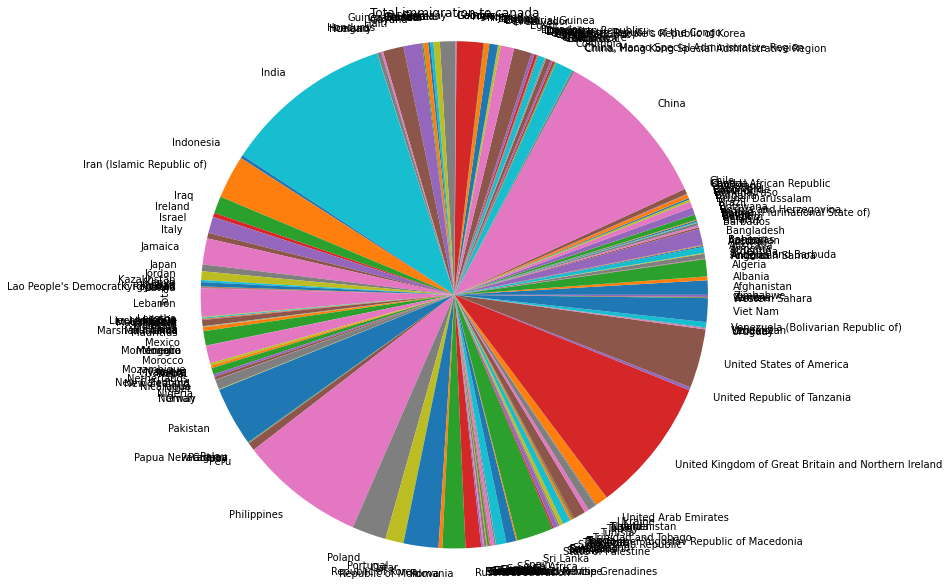

In [168]:
#PIE CHARTS
#figsize means size of the figure.
df_can['Total'].plot(
    kind='pie',
    figsize=(10,10)
)

plt.title('Total immigration to canada')#Writing title of the Pie Charts
plt.axis('equal') #pie chart as circle else it will be a little tilted
plt.show()#Show the plot

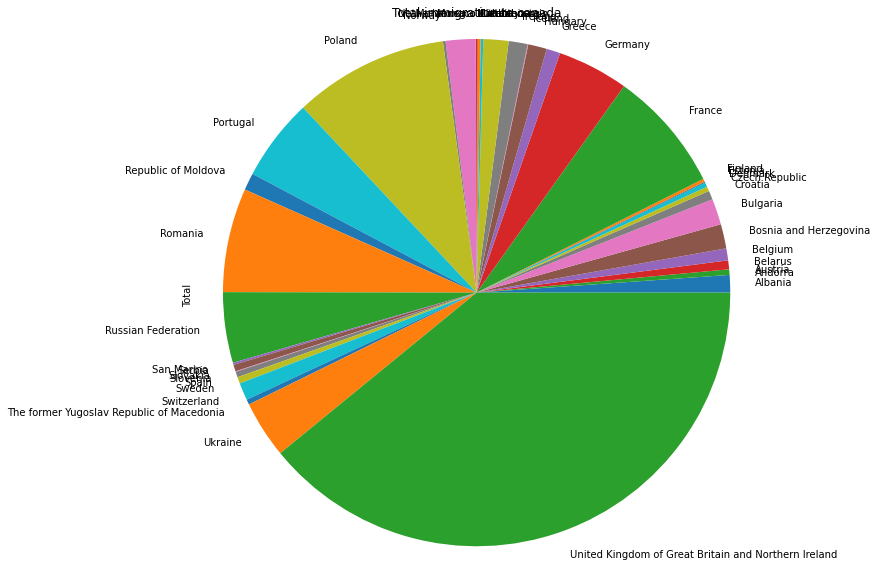

In [169]:
#using a condition to give output of only Europe countries
condition=df_can['Continent']=='Europe'
dfnew=df_can[(condition)]

dfnew['Total'].plot(
    kind='pie',
    figsize=(10,10)
)

plt.title('Total immigration to canada')
plt.axis('equal') 
plt.show()

**Assignment:**

**1)By Continent-region pie-chart use colorlists, explode, pct, figsize, add title, add axes, add legend, remove labels and use shadows.**


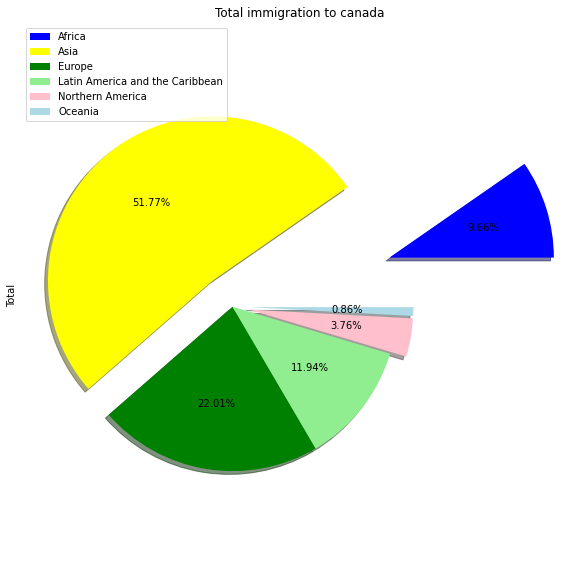

In [170]:
#All countries of same continent are added up row wise(index)
dfnew1=df_can.groupby('Continent',axis='index').sum()
dfnew1.head()


colorlist = ['blue','yellow','green','lightgreen','pink','lightblue']
explodelist=[1,0.2,0,0,0.1,0.1]



#autopct=Add percentage(upto single decimal show me percentage)
#plt.legends to add color info (whose colour is what)
#labels means pie chart ke aaju baju labels hone chahiye ya nahi(Default is Yes Legends)
dfnew1['Total'].plot(
    kind='pie',
    figsize=(10,10),
    autopct='%1.2f%%',
    shadow=True,
    labels=None,
    colors=colorlist,
    explode=explodelist
)

plt.title('Total immigration to canada')
plt.axis('equal') #pie chart as circle else it will be a little tilted
plt.legend(labels=dfnew1.index, loc='upper left')#loc:position of the legend in the diagram
plt.show()

In [171]:
df_can.tail()

,Continent,Continent-Region,Development-status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,12,7,18,4,18,41,41,39,73,144,121,141,134,122,181,171,113,124,161,140,122,133,128,211,160,174,217,2985
Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,15,23,44,68,77,69,73,46,51,41,34,72,34,51,39,78,50,46,56,91,77,71,64,60,102,69,46,59,1677
Zimbabwe,Africa,Eastern Africa,Developing regions,72,114,102,44,32,29,43,68,99,187,129,94,61,72,78,58,39,44,43,49,98,110,191,669,1450,615,454,663,611,508,494,434,437,407,8598


**Assignment**

**2)By Development-status pie-chart use colorlists, explode, pct, figsize, add title, add axes, add legend, remove labels and use shadows.** 

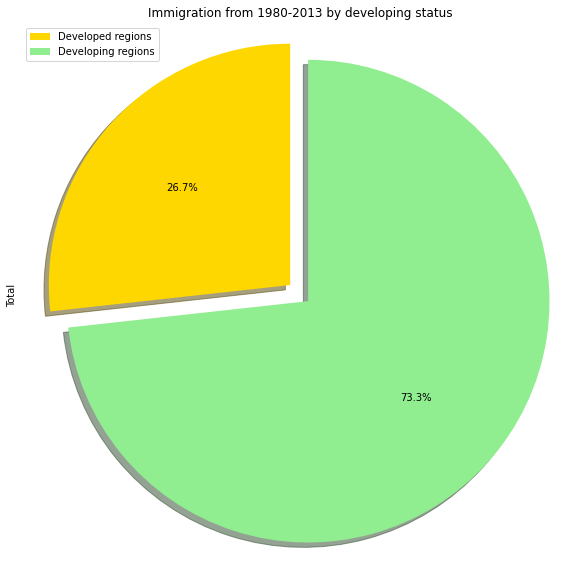

In [172]:
# plot pie chart of dev status 
#All countries of same continent are added up row wise(index)
dfnew1=df_can.groupby('Development-status',axis='index').sum()
dfnew1.head()

colorlist = ['gold', 'lightgreen']
explodelist = [0,0.1]


dfnew1['Total'].plot(
    kind='pie',
    figsize=(10,10),
    startangle=90,
    autopct='%1.1f%%',
    shadow=True,
    labels=None,
    colors=colorlist,
    explode=explodelist
)

plt.title('Immigration from 1980-2013 by developing status')
plt.axis('equal') #pie chart looks like a circle
plt.legend(labels=dfnew1.index, loc='upper left')
plt.show()

In [173]:
#BoxPlot

#it gives : Min-First Quartile-median-third-qartile-max-Outliers
#Inter Quartile Range=(Third Quartile-First Quartile)
#can use df.describle() or matplotlib

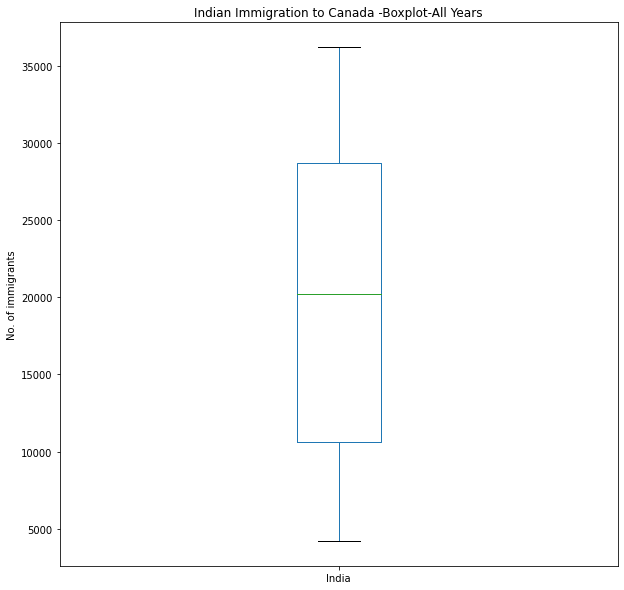

In [174]:
df_india=df_can.loc['India',years].transpose()
df_india.tail()

df_india.plot(
    kind='box',
    figsize=(10,10)
)

plt.title("Indian Immigration to Canada -Boxplot-All Years")
plt.ylabel('No. of immigrants')#Y-axis Title
plt.show()

In [175]:
df_india.head()

1980    8880
1981    8670
1982    8147
1983    7338
1984    5704
Name: India, dtype: object

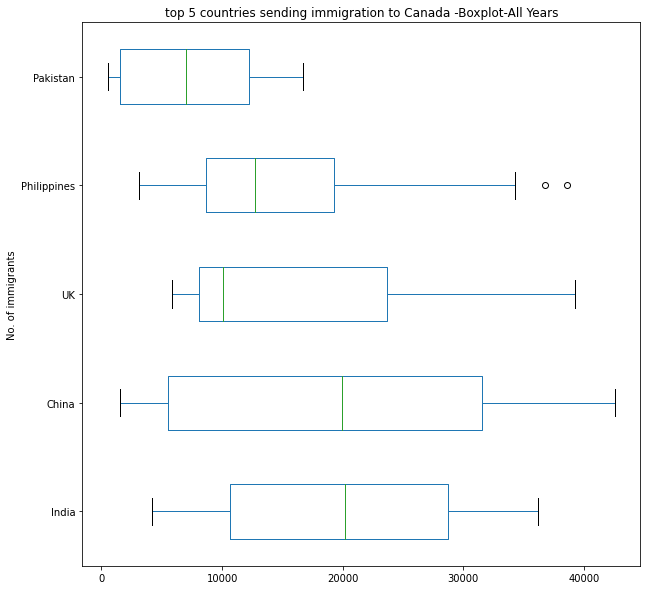

In [176]:
df_can.sort_values(by="Total",axis='index',inplace=True,ascending=False)#To sort values In Descending order
#ascending=False: Descending
#ascending=True: Ascending
#by: wrt that column
#vert means vertical =True/False (Default :True)
dtop5=df_can.head(5)#takes only top 5 values
dtop5=dtop5[years]
dtop5=dtop5.transpose()

#Rename a column
dtop5.rename(columns={'United Kingdom of Great Britain and Northern Ireland':'UK'}, inplace=True)

dtop5.plot(
    kind='box',
    figsize=(10,10),
    vert=False
)

plt.title("top 5 countries sending immigration to Canada -Boxplot-All Years")
plt.ylabel('No. of immigrants')
plt.show()

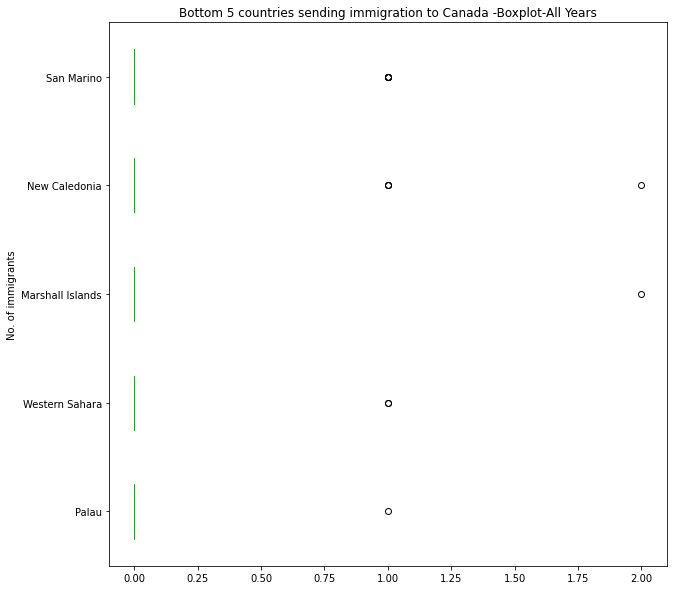

In [177]:
#Bottom 5
df_can.sort_values(by="Total",axis='index',inplace=True,ascending=True)

dbottom5=df_can.head(5)#takeo only bottom 5
dbottom5=dbottom5[years]#Will keep all the years wala column only
dbottom5=dbottom5.transpose()#trnspose it touse plot function

dbottom5.plot(
    kind='box',
    figsize=(10,10),
    vert=False
)

plt.title("Bottom 5 countries sending immigration to Canada -Boxplot-All Years")
plt.ylabel('No. of immigrants')
plt.show()

**Assignment for Norway-Sweden-Denmark**

In [191]:
df1=df_can.copy()#Very Important Step for copying Data Frame from one to another
df_can.head()

,Continent,Continent-Region,Development-status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Palau,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,2,5
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,5


In [192]:
df1.drop(["Continent","Continent-Region","Development-status","Total"], axis='columns',inplace=True)
df1=df1.transpose()
df1.tail()

Country,Palau,Western Sahara,Marshall Islands,New Caledonia,San Marino,American Samoa,Tuvalu,Sao Tome and Principe,Vanuatu,Kiribati,Andorra,Nauru,Canada,Monaco,Maldives,Liechtenstein,Equatorial Guinea,Papua New Guinea,Samoa,Guinea-Bissau,Montenegro,Lesotho,Tonga,Qatar,Mozambique,Swaziland,Comoros,Cabo Verde,Luxembourg,Oman,"China, Macao Special Administrative Region",Malawi,Turkmenistan,Namibia,Democratic People's Republic of Korea,Botswana,Bahrain,Tajikistan,Slovenia,Central African Republic,...,Syrian Arab Republic,Turkey,Peru,Ethiopia,Jordan,Nigeria,South Africa,Somalia,Trinidad and Tobago,Ukraine,El Salvador,Afghanistan,Mexico,Russian Federation,Germany,Bangladesh,Israel,Algeria,Iraq,Colombia,Morocco,Egypt,Portugal,Guyana,Haiti,Romania,Viet Nam,Jamaica,France,Lebanon,Poland,Republic of Korea,Sri Lanka,Iran (Islamic Republic of),United States of America,Pakistan,Philippines,United Kingdom of Great Britain and Northern Ireland,China,India
2009,0,0,0,0,0,0,0,1,1,1,0,1,0,0,7,1,5,1,2,0,10,8,5,6,12,10,19,1,5,7,21,10,20,14,11,15,35,50,27,19,...,917,1238,1884,1289,1235,3156,1188,1214,1134,2367,845,1746,3092,2931,3887,2104,2316,5393,5450,4652,5532,3496,623,1180,2080,2076,2171,2456,5051,3077,1013,5874,4547,6580,8995,7217,28573,8876,29622,29456
2010,0,0,0,0,1,0,0,2,0,0,0,0,0,4,4,0,4,3,5,2,14,7,5,18,7,3,22,3,8,14,21,28,30,16,45,42,28,52,12,26,...,1039,1492,1283,1865,1831,3906,1238,1528,915,3159,787,1758,3865,2288,2956,4721,2755,4752,5941,5218,6242,5982,629,953,4744,1922,1942,2321,4646,3432,795,5537,4422,7477,8142,6811,38617,8724,30391,34235
2011,0,0,0,0,0,0,1,0,0,0,0,0,1,1,3,2,4,0,3,2,19,1,2,3,3,13,14,3,11,10,13,16,20,23,97,53,21,47,13,18,...,1005,1257,886,2163,1635,3103,959,1535,588,2515,691,2203,3947,1963,2053,2694,1970,4325,6196,4366,4399,4663,528,804,6503,1776,1723,2059,4080,3072,720,4588,3309,7479,7676,7468,36765,6204,28502,27509
2012,0,0,0,0,0,0,0,0,0,2,1,0,1,3,1,1,4,3,2,4,26,0,3,14,4,17,18,6,6,13,33,9,20,24,66,64,39,34,36,45,...,650,1068,787,1864,1206,3443,1243,1582,586,2265,641,2635,4227,2079,1702,2640,2134,3774,4041,3741,3878,5555,560,676,5868,1588,1731,2182,6280,1614,779,5316,3338,7534,7891,11227,34315,6195,33024,30933
2013,0,0,0,2,0,0,0,1,0,0,1,1,2,1,1,0,11,3,0,0,9,6,5,6,12,39,22,2,7,11,29,10,14,83,17,76,32,39,20,169,...,1009,729,682,1606,1255,4172,1240,2028,427,2487,639,2004,3996,2466,1217,3789,1945,4331,4918,3631,3261,4165,630,656,4152,1512,2112,2479,5623,2172,852,4509,2394,11291,8501,12603,29544,5827,34129,33087


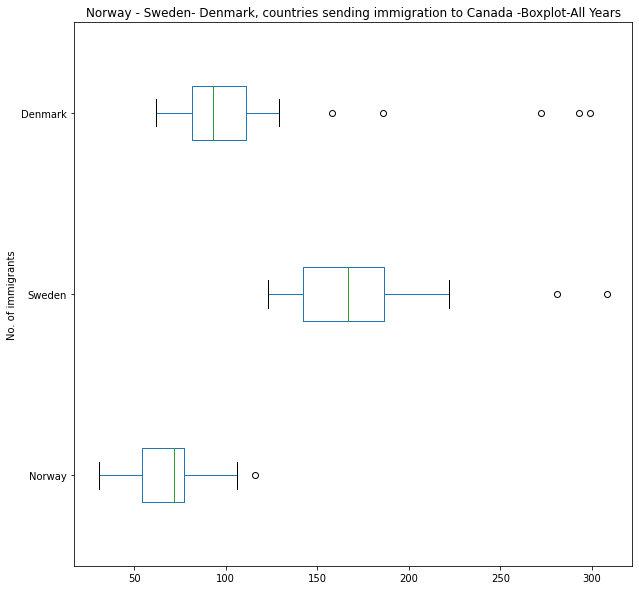

In [194]:
dfnsd=df1[["Norway","Sweden",'Denmark']]
#dfnsd.tail()
dfnsd.plot(kind='box',figsize=(10,10),vert=False)

plt.title("Norway - Sweden- Denmark, countries sending immigration to Canada -Boxplot-All Years")
plt.ylabel('No. of immigrants')
plt.show()

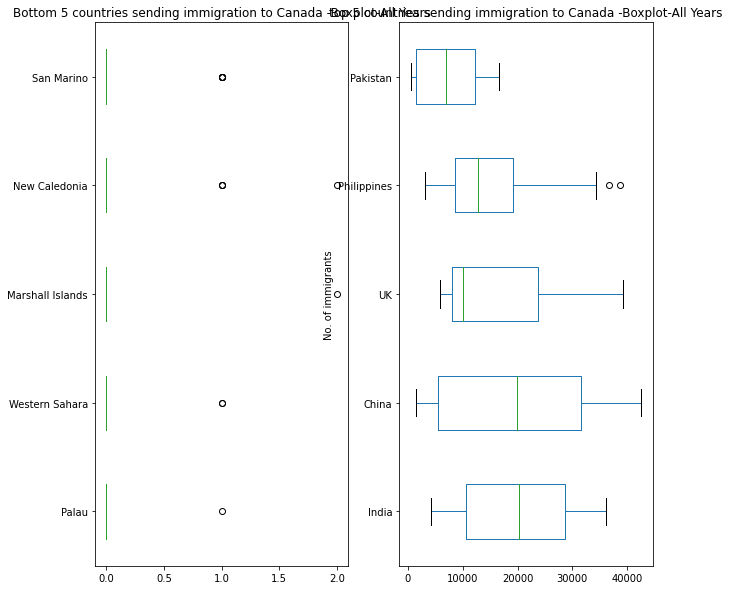

In [195]:
#using subplots
#In subplotsplot_varaible.set_title:To set title of plot
#plot_varaible.y_label:To set y axis label
#in ax write your own name or else 2 plots will be in the same figure

fig=plt.figure()#Need to create a figure

#Create 2 subplots inside the figure 'fig'
ax1=fig.add_subplot(1,2,1)#1 row,2 columsn-1st figure
ax2=fig.add_subplot(1,2,2)#1 row,2 columsn-2nd figure

#write whic is ax1 and which is ax2
dbottom5.plot(kind='box',figsize=(10,10),vert=False,ax=ax1)
ax1.set_title("Bottom 5 countries sending immigration to Canada -Boxplot-All Years")
ax2.set_ylabel('No. of immigrants')

dtop5.plot(kind='box',figsize=(10,10),vert=False,ax=ax2)
ax2.set_title("top 5 countries sending immigration to Canada -Boxplot-All Years")
ax2.set_ylabel('No. of immigrants')

plt.show()

In [196]:
df_can.rename(columns={'United Kingdom of Great Britain and Northern Ireland':'UK'}, inplace=True)

**Assignment:**

**3)Create 4 subplots - to display boxplot of top 5 countries in europe, asia, africa, oceania**


In [197]:
df_can.head()

,Continent,Continent-Region,Development-status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Palau,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,2,5
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,5


In [198]:
years=range(1980,2014)
condition=df_can['Continent']=='Europe'
dfnew=df_can[(condition)]

dfnew.sort_values(by="Total",axis='index',inplace=True,ascending=False)


dtope=dfnew.head(5)
dtope=dtope[years]
dtope=dtope.transpose()
dtope.rename(columns={'United Kingdom of Great Britain and Northern Ireland':'UK'}, inplace=True)
dtope.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Country,UK,Poland,France,Romania,Portugal
2009,8876,1013,5051,2076,623
2010,8724,795,4646,1922,629
2011,6204,720,4080,1776,528
2012,6195,779,6280,1588,560
2013,5827,852,5623,1512,630


In [199]:
years=range(1980,2014)
condition=df_can['Continent']=='Asia'
dfnew=df_can[(condition)]

dfnew.sort_values(by="Total",axis='index',inplace=True,ascending=False)


dtopa=dfnew.head(5)
dtopa=dtopa[years]
dtopa=dtopa.transpose()
dtopa.rename(columns={'Iran (Islamic Republic of)':'Iran'}, inplace=True)

dtopa.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Country,India,China,Philippines,Pakistan,Iran
2009,29456,29622,28573,7217,6580
2010,34235,30391,38617,6811,7477
2011,27509,28502,36765,7468,7479
2012,30933,33024,34315,11227,7534
2013,33087,34129,29544,12603,11291


In [200]:
years=range(1980,2014)
condition=df_can['Continent']=='Africa'
dfnew=df_can[(condition)]

dfnew.sort_values(by="Total",axis='index',inplace=True,ascending=False)


dtopaf=dfnew.head(5)
dtopaf=dtopaf[years]
dtopaf=dtopaf.transpose()
dtopaf.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Country,Egypt,Morocco,Algeria,Somalia,South Africa
2009,3496,5532,5393,1214,1188
2010,5982,6242,4752,1528,1238
2011,4663,4399,4325,1535,959
2012,5555,3878,3774,1582,1243
2013,4165,3261,4331,2028,1240


In [201]:
years=range(1980,2014)
condition=df_can['Continent']=='Oceania'
dfnew=df_can[(condition)]

dfnew.sort_values(by="Total",axis='index',inplace=True,ascending=False)


dtopo=dfnew.head(5)
dtopo=dtopo[years]
dtopo=dtopo.transpose()
dtopo.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Country,Australia,Fiji,New Zealand,Tonga,Samoa
2009,1018,311,520,5,2
2010,933,398,490,5,5
2011,851,316,375,2,3
2012,982,270,417,3,2
2013,1121,228,415,5,0


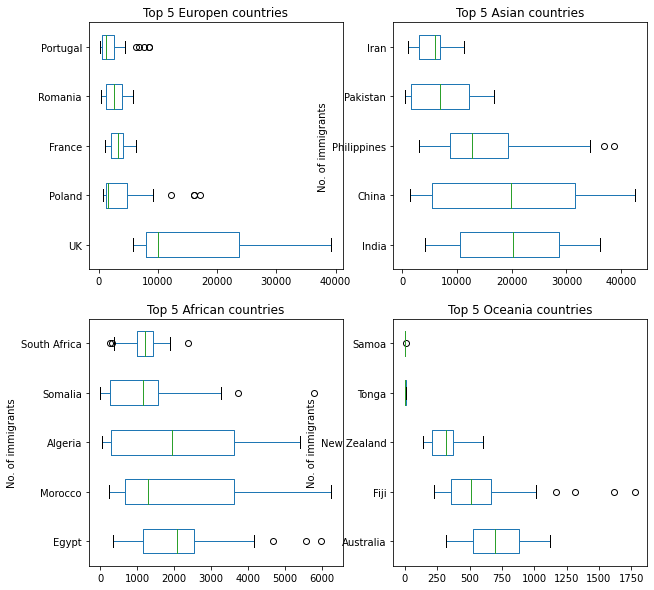

In [202]:
#using subplots

fig=plt.figure()

#Create 2 subplots
ax1=fig.add_subplot(2,2,1)#2 row,2 columsn-1st figure
ax2=fig.add_subplot(2,2,2)#2 row,2 columsn-2nd figure
ax3=fig.add_subplot(2,2,3)#2 row,2 columsn-3rd figure
ax4=fig.add_subplot(2,2,4)#2 row,2 columsn-4th figure

#write whic is ax1 and which is ax2
dtope.plot(kind='box',figsize=(10,10),vert=False,ax=ax1)
ax1.set_title("Top 5 Europen countries")
ax2.set_ylabel('No. of immigrants')

dtopa.plot(kind='box',figsize=(10,10),vert=False,ax=ax2)
ax2.set_title("Top 5 Asian countries")
ax2.set_ylabel('No. of immigrants')

dtopaf.plot(kind='box',figsize=(10,10),vert=False,ax=ax3)
ax3.set_title("Top 5 African countries")
ax3.set_ylabel('No. of immigrants')

dtopo.plot(kind='box',figsize=(10,10),vert=False,ax=ax4)
ax4.set_title("Top 5 Oceania countries")
ax4.set_ylabel('No. of immigrants')



plt.show()

**Assignment :**

**4) Identify countries which are outliers based on total migration**

In [203]:
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,964.379487,1064.148718,1136.856410,1138.712821,993.153846,962.625641,1026.076923,989.153846,824.241026,922.143590,1111.343590,1244.323077,1144.158974,1114.343590,1190.169231,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,3158.730195,2952.093731,3330.083742,3495.220063,3613.336444,3091.492343,3321.045004,3070.761447,2385.943695,2887.632585,3664.042361,3961.621410,3660.579836,3623.509519,3710.505369,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,2.000000,3.000000,6.500000,11.500000,9.500000,10.500000,14.500000,19.500000,15.000000,16.000000,16.000000,22.000000,18.500000,21.500000,19.000000,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,38.000000,51.000000,74.000000,85.000000,76.000000,91.000000,118.000000,114.000000,106.000000,116.000000,138.000000,169.000000,165.000000,161.000000,191.000000,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,612.500000,657.500000,655.000000,722.500000,545.000000,550.500000,603.500000,612.500000,535.500000,548.500000,659.000000,793.500000,686.000000,673.500000,756.500000,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,31668.000000,23380.000000,34123.000000,33720.000000,39231.000000,30145.000000,29322.000000,22965.000000,21049.000000,30069.000000,35529.000000,36434.000000,31961.000000,36439.000000,36619.000000,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


In [204]:
#Find Outliers in data
# larger than Q3 (75%) by 1.5IQR
# smaller than Q1 (25%) by 1.5IQR
#From above Image
Q1 = 952
Q3 = 22239.5
IQR = Q3 - Q1

Outlier1 = Q1 - (1.5)*(IQR)
Outlier2 = Q3 + (1.5)*(IQR)

Outliers=df_can[(df_can['Total']< Outlier1 ) | (df_can['Total']> Outlier2 )]
Outliers.reset_index(inplace=True)
Outliers

,Country,Continent,Continent-Region,Development-status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,El Salvador,Latin America and the Caribbean,Central America,Developing regions,110,295,882,2587,2666,2769,3106,3558,2720,2955,4384,7124,5670,2977,1217,722,736,603,477,424,569,453,473,446,442,436,430,929,1115,845,787,691,641,639,54878
1,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
2,Mexico,Latin America and the Caribbean,Central America,Developing regions,409,394,491,490,509,425,667,813,916,1017,1193,1134,1189,1139,776,758,1234,1689,1379,1679,1662,1939,1894,1754,2259,2837,2844,3239,2856,3092,3865,3947,4227,3996,58712
3,Russian Federation,Europe,Eastern Europe,Developed regions,0,0,0,0,0,0,0,0,0,0,0,0,172,906,1327,1819,2640,3708,4388,4053,3843,4351,3941,3718,3989,3972,3117,2983,2690,2931,2288,1963,2079,2466,63344
4,Germany,Europe,Western Europe,Developed regions,1626,1977,3062,2376,1610,1441,1233,1704,1482,1706,1273,1273,1181,1488,1255,1553,1686,1397,1363,1717,1703,1456,1375,1865,2020,2226,2767,2449,3833,3887,2956,2053,1702,1217,63912
5,Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,503,476,387,611,1115,1655,1280,1361,2042,2824,3378,2202,2064,3119,3831,2944,2137,2660,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
6,Israel,Asia,Western Asia,Developing regions,1403,1711,1334,541,446,680,1212,1497,1389,1762,1596,1358,1259,1584,1699,2224,2515,2998,3172,2387,2510,2436,2539,2314,2788,2446,2625,2401,2562,2316,2755,1970,2134,1945,66508
7,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
8,Iraq,Asia,Western Asia,Developing regions,262,245,260,380,428,231,265,384,619,911,557,1013,1498,2103,1500,2034,2675,2564,2037,2159,2591,2821,2432,1515,1796,2226,1788,2406,3543,5450,5941,6196,4041,4918,69789
9,Colombia,Latin America and the Caribbean,South America,Developing regions,266,326,360,244,235,214,257,376,352,439,614,652,582,464,375,371,381,578,929,1306,2259,2965,3283,4318,4566,6424,6535,5357,5452,4652,5218,4366,3741,3631,72088


**There are 30 countries which are outliers of Total Immigation**




**Assignemnt 2:**


**5) Identify countries which are outliers basedon year 2013**

In [205]:
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,964.379487,1064.148718,1136.856410,1138.712821,993.153846,962.625641,1026.076923,989.153846,824.241026,922.143590,1111.343590,1244.323077,1144.158974,1114.343590,1190.169231,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,3158.730195,2952.093731,3330.083742,3495.220063,3613.336444,3091.492343,3321.045004,3070.761447,2385.943695,2887.632585,3664.042361,3961.621410,3660.579836,3623.509519,3710.505369,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,2.000000,3.000000,6.500000,11.500000,9.500000,10.500000,14.500000,19.500000,15.000000,16.000000,16.000000,22.000000,18.500000,21.500000,19.000000,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,38.000000,51.000000,74.000000,85.000000,76.000000,91.000000,118.000000,114.000000,106.000000,116.000000,138.000000,169.000000,165.000000,161.000000,191.000000,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,612.500000,657.500000,655.000000,722.500000,545.000000,550.500000,603.500000,612.500000,535.500000,548.500000,659.000000,793.500000,686.000000,673.500000,756.500000,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,31668.000000,23380.000000,34123.000000,33720.000000,39231.000000,30145.000000,29322.000000,22965.000000,21049.000000,30069.000000,35529.000000,36434.000000,31961.000000,36439.000000,36619.000000,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


In [206]:
#Find Outliers in data
# larger than Q3 (75%) by 1.5IQR
# smaller than Q1 (25%) by 1.5IQR
#From above Image
Q1 = 45
Q3 = 796
IQR = Q3 - Q1

Outlier1 = Q1 - (1.5)*(IQR)
Outlier2 = Q3 + (1.5)*(IQR)

Outliers=df_can[(df_can[2013]< Outlier1 ) | (df_can[2013]> Outlier2 )]
Outliers.reset_index(inplace=True)
Outliers.shape

(29, 39)

**There are 29 countries which are outliers in year 2013**

In [207]:
dfscat=df_can[years].sum(axis='index')
type(dfscat)#new to convert to add frame
dfscat=pd.DataFrame(dfscat)
type(dfscat)

dfscat.reset_index(inplace=True)#to convert to 2 columns as first we had 1 column only
dfscat.columns=['Year','Total']
dfscat

,Year,Total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417
5,1985,69978
6,1986,86048
7,1987,134771
8,1988,139306
9,1989,164432


In [208]:
x=dfscat['Year']
y=dfscat['Total']
fit=np.polyfit(x,y,1)#Linear regression
fit#0 is slope & 1 is intercept

array([ 5.56709228e+03, -1.09261952e+07])

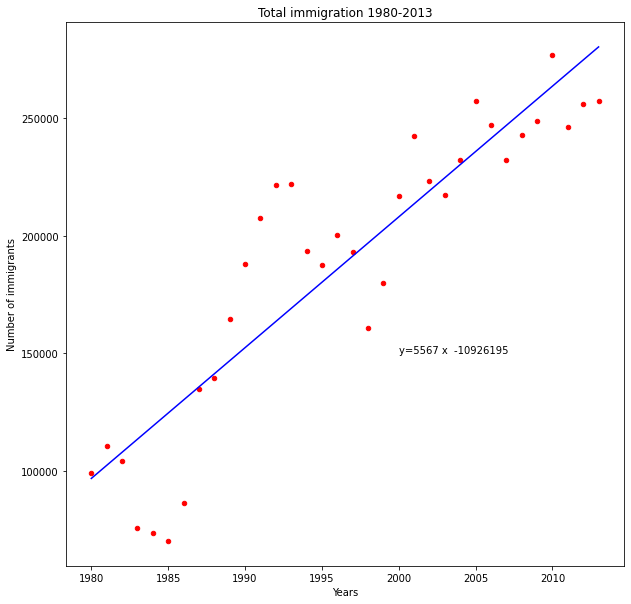

In [209]:
dfscat.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Total',
    color='red'
)
plt.title("Total immigration 1980-2013")
plt.xlabel("Years")
plt.ylabel("Number of immigrants")


plt.plot(x,fit[0]*x+fit[1], color='blue')

plt.annotate('y={0:.0f} x  {1: .0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

In [210]:
#Bubble plots

dfnew = df_can[years].transpose()
dfnew.reset_index(inplace=True)
dfnew.head()
dfnew.rename(columns={'index':'Year'}, inplace=True)
dfnew['Total'] = dfnew.sum(axis='columns')
dfnew=dfnew[['Year',"India","China"]]
dfnew.tail()

Country,Year,India,China
29,2009,29456,29622
30,2010,34235,30391
31,2011,27509,28502
32,2012,30933,33024
33,2013,33087,34129


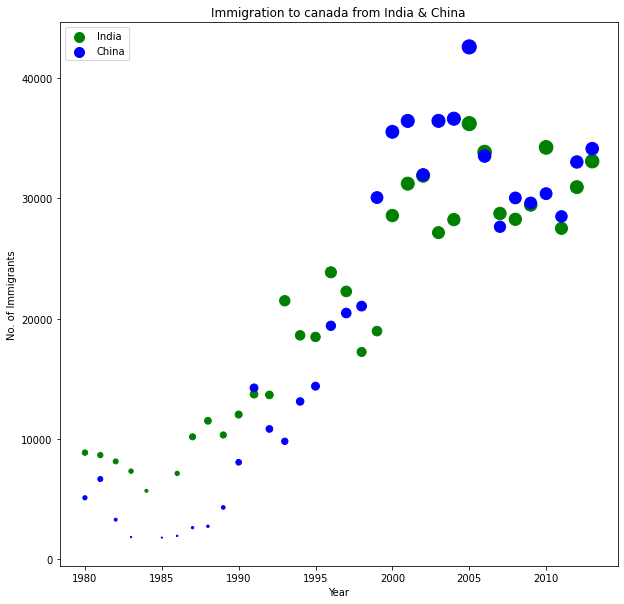

In [211]:
#normalize
#x'=(X-Xmin)/(Xmax-Xmin)

norm_india = (dfnew['India'] - dfnew['India'].min()) / (dfnew['India'].max() - dfnew['India'].min())

norm_china = (dfnew['China'] - dfnew['China'].min()) / (dfnew['China'].max() - dfnew['China'].min())

ax1=dfnew.plot(
    kind="scatter",
    x="Year",
    y="India",
    figsize=(10,10),
    color='green',
    s=norm_india*200
)

ax2=dfnew.plot(
    kind="scatter",
    x="Year",
    y="China",
    figsize=(10,10),
    color='blue',
    ax=ax1,
    s=norm_china*200
)

ax1.set_title("Immigration to canada from India & China")
ax1.set_ylabel("No. of Immigrants")
ax1.legend(['India','China'], loc='upper left')


**Assignment :**

**5) Plot the bubble plot for Norway, Denmark, Finland**


In [212]:
dfnew = df_can[years].transpose()
dfnew.reset_index(inplace=True)
dfnew.head()
dfnew.rename(columns={'index':'Year'}, inplace=True)
dfnew['Total'] = dfnew.sum(axis='columns')
dfnew=dfnew[['Year',"Denmark","Finland","Norway"]]
dfnew.tail()

Country,Year,Denmark,Finland,Norway
29,2009,81,63,75
30,2010,92,63,46
31,2011,93,72,49
32,2012,94,62,53
33,2013,81,76,59


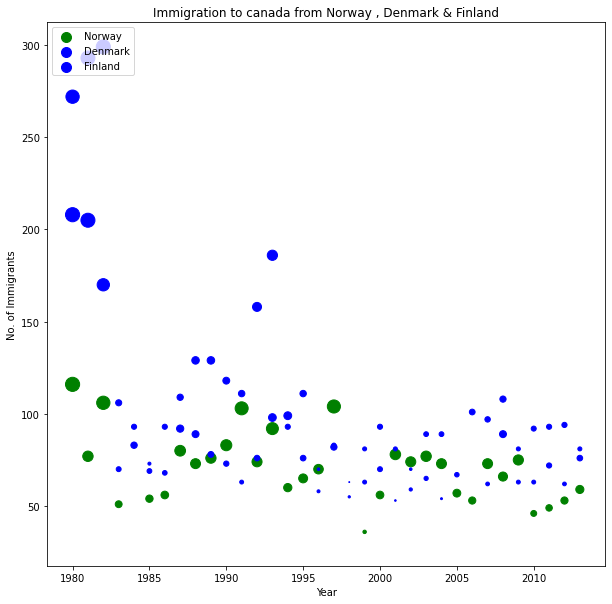

In [213]:
#normalize
#x'=(X-Xmin)/(Xmax-Xmin)

norm_Norway = (dfnew['Norway'] - dfnew['Norway'].min()) / (dfnew['Norway'].max() - dfnew['Norway'].min())
norm_Denamrk = (dfnew['Denmark'] - dfnew['Denmark'].min()) / (dfnew['Denmark'].max() - dfnew['Denmark'].min())
norm_Finland = (dfnew['Finland'] - dfnew['Finland'].min()) / (dfnew['Finland'].max() - dfnew['Finland'].min())

ax1=dfnew.plot(
    kind="scatter",
    x="Year",
    y="Norway",
    figsize=(10,10),
    color='green',
    s=norm_Norway*200
)

ax2=dfnew.plot(
    kind="scatter",
    x="Year",
    y="Denmark",
    figsize=(10,10),
    color='blue',
    ax=ax1,
    s=norm_Denamrk*200
)

ax3=dfnew.plot(
    kind="scatter",
    x="Year",
    y="Finland",
    figsize=(10,10),
    color='blue',
    ax=ax1,
    s=norm_Finland*200
)

ax1.set_title("Immigration to canada from Norway , Denmark & Finland")
ax1.set_ylabel("No. of Immigrants")
ax1.legend(['Norway','Denmark',"Finland"], loc='upper left')

# **Waffle Charts**

Waffle Charts
A waffle chart is an interesting visualization that is normally created to display progress toward goals. It is commonly an effective option when you are trying to add interesting visualization features to a visual that consists mainly of cells, such as an Excel dashboard.

In [214]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


In [215]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

In [216]:
dfindopakchina = df_can.loc[['India', 'Pakistan', 'China'], :]

dfindopakchina

,Continent,Continent-Region,Development-status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962


In [217]:
df_dsn = df_can.loc[['India', 'Pakistan', 'China'], :]

categories = df_dsn.index.values # categories

value = dfindopakchina['Total']# correponding values of categories

#create a waffle chart

width=40
height=10

colormap = plt.cm.coolwarm # color map class

Total number of tiles is 400
India: 174
Pakistan: 61
China: 166


<Figure size 432x288 with 0 Axes>

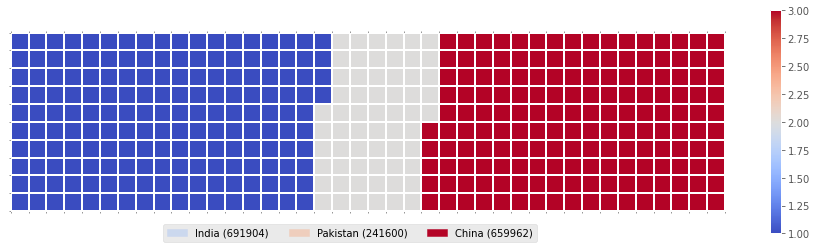

In [218]:
create_waffle_chart(categories, value, height, width, colormap)

**Assignment**

**Create a Waffle chart with Norway,Sweden,Denamark**

In [219]:
# let's create a new dataframe for these three countries 
df_dsn = df_can.loc[['Norway', 'Denmark', 'Sweden'], :]

# let's take a look at our dataframe
df_dsn

,Continent,Continent-Region,Development-status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,80,73,76,83,103,74,92,60,65,70,104,31,36,56,78,74,77,73,57,53,73,66,75,46,49,53,59,2327
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,109,129,129,118,111,158,186,93,111,70,83,63,81,93,81,70,89,89,62,101,97,108,81,92,93,94,81,3901
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,198,171,182,130,167,179,203,192,176,161,151,123,170,138,184,149,161,129,205,139,193,165,167,159,134,140,140,5866


In [220]:
width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class
print(values)

Country
Norway     2327
Denmark    3901
Sweden     5866
Name: Total, dtype: int64


Total number of tiles is 400
Norway: 77
Denmark: 129
Sweden: 194


<Figure size 432x288 with 0 Axes>

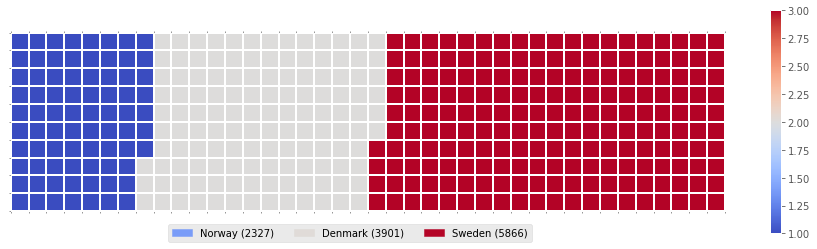

In [221]:
create_waffle_chart(categories, values, height, width, colormap)

# **Word clouds**

In [222]:
# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

# download file and save as alice_novel.txt
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/alice_novel.txt

# open the file and read it into a variable alice_novel
alice_novel = open('alice_novel.txt', 'r').read()
    
print ('File downloaded and saved!')

/bin/bash: conda: command not found
Wordcloud is installed and imported!
File downloaded and saved!


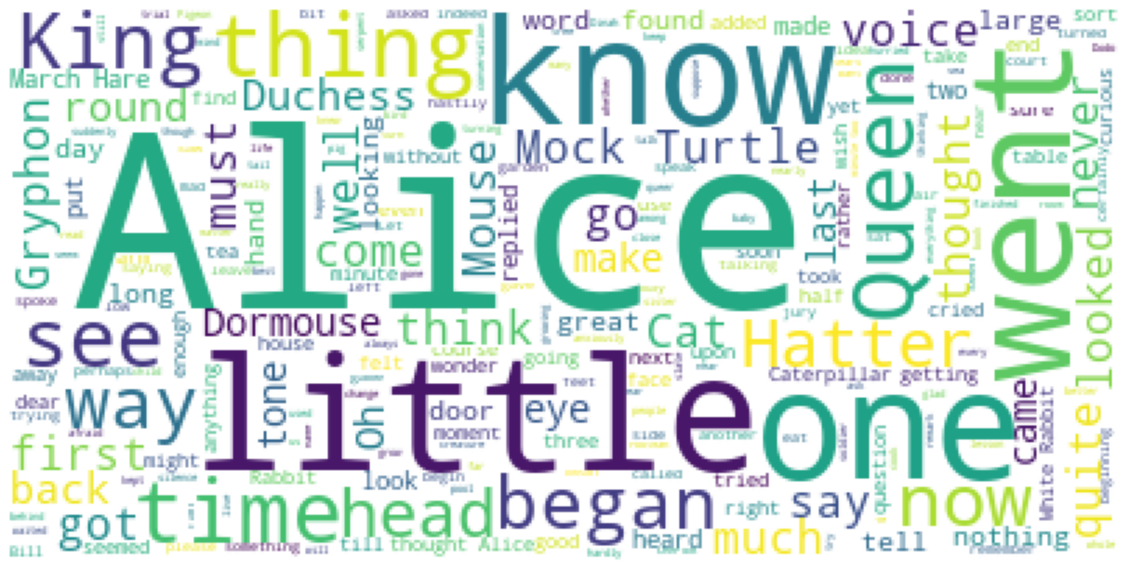

In [223]:
#step1 - preprocessing

stopwordsrem = set(STOPWORDS)
stopwordsrem.add('said')#As 'said' was first there twice also


#step 2-wordcloud object

alicewc = WordCloud(
    background_color = 'white',
    max_words = 2000,#How many maximum words you want
    stopwords = stopwordsrem
)


#step3 - use the object to call function
alicewc.generate(alice_novel)

# step 4 - display
fig=plt.figure()
fig.set_figwidth(20)
fig.set_figheight(20)
plt.imshow(alicewc)
plt.axis('off')#as here there is no axis
plt.show()

# **MAPS**

In [224]:
import numpy as np
import pandas as pd
import folium 

In [225]:
map1=folium.Map()
map1

In [226]:
map2=folium.Map(location=[37.22,-122.16],zoom_start=12)
map2

In [229]:
map3 = folium.Map(location=[56.130, -106.35], zoom_start=10, tiles='Stamen Toner')
map3

In [228]:
map4 = folium.Map(location=[56.130, -106.35], zoom_start=5, tiles='Stamen Terrain')
map4

In [230]:
#Find coordinates of mumbai and plot on maps

In [231]:
mumbaimap=folium.Map(location=[19.0760,72.8777],zoom_start=11)
mumbaimap


In [232]:
#Co-ordinates of Crime in san-Franciso
df_incidents = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')
 
print('Dataset downloaded and read into a pandas dataframe!')
 
df_incidents.head()
 
df_incidents.shape

Dataset downloaded and read into a pandas dataframe!


(150500, 13)

In [233]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


# **Markers with Maps**

In [234]:
#obtain dataset of first 100 only(0-99 rows)
df1=df_incidents.iloc[0:100,:]

#co-ordinates of San-Fransciso
lat=37.77
longs=-122.42

map1=folium.Map(location=[lat,longs],zoom_start=12)

#cluster
from folium import plugins
clust=plugins.MarkerCluster().add_to(map1)

#since 3 variables are looed we use zip function
for lat, longs, labels in zip(df1.Y, df1.X, df1.Category):
  folium.CircleMarker(
      [lat, longs],
      radius=5,
      color='yellow',
      fill=True,
      popup=labels,
      fill_color='blue',
      fill_opacity=0.6,
  ).add_to(clust)

map1

In [235]:
#to see all the first 100 crimes done on Friday
condition=df_incidents['DayOfWeek']=='Friday'
dfnew=df_incidents[(condition)]

df3=dfnew.iloc[0:100,:]

#co-ordinates of San-Fransciso
lat=37.77
longs=-122.42

map1=folium.Map(location=[lat,longs],zoom_start=12)
map1

#since 3 variables are looed we use zip function
for lat, longs, labels in zip(df3.Y, df3.X, df3.Category):
  folium.CircleMarker(
      [lat, longs],
      radius=5,
      color='yellow',
      fill=True,
      popup=labels,
      fill_color='blue',
      fill_opacity=0.6
  ).add_to(map1)

map1

# **Choropleth Map**

In [236]:
#we need countries immigration info & co-ordinates
df_can.reset_index(inplace=True)

In [237]:
# download countries geojson file
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
 
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [238]:
#done 
#now
worldmap = folium.Map(location=[0,0], zoom_start=2, tiles='Stamen Watercolor')
worldmap

world_geo = r'world_countries.json'
#to introduce our scale:Like we did in binning(histogram)
scale = np.linspace(df_can['Total'].min(), df_can['Total'].max(), 6, dtype=int)
scale = scale.tolist()
scale[-1] = scale[-1]+1

worldmap.choropleth(
    geo_data = world_geo,#co-ordinates data
    data=df_can,#immigartiondata
    columns=['Country','Total'],#what to plot from immigration Data
    key_on='feature.properties.name',#wLocation ofCountries names in JSON file
    legend='Immigration to Canada',
    fill_color='YlOrRd',#giving range of colors yellow to red
    threshold_scale=scale#applying above defined scale
 )

worldmap

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning




---

